<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS767/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1)
## Keras.io References/learnings

* Keras Tuner (https://keras.io/keras_tuner/)
Keras Tuner is an optimization framework that solves the pain of hyperparameter search.

* Transfer learning & fine-tuning (https://keras.io/guides/transfer_learning/)
Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. 

* Making layers and models via subclassing (https://keras.io/guides/making_new_layers_and_models_via_subclassing/)
Keras provides an option to inherit and customize the layers and create custom models

* Dropout layer (https://keras.io/api/layers/regularization_layers/dropout/)
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting

* ModelCheckpoint (https://keras.io/api/callbacks/model_checkpoint/)
ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing


# Question A)

In [2]:


fashion_mnist = keras.datasets.fashion_mnist

# Load dataset  
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

# Check shape of inputs
X_train_full.shape

# Question B)

In [5]:
# divide datasets into training and validation set
X_valid, X_train = X_train_full[:6000] , X_train_full[6000:]
Y_valid, Y_train = Y_train_full[:6000] , Y_train_full[6000:]

# Question C) 

In [6]:
# min-max normalization
min_max_scaler = preprocessing.MinMaxScaler()
X_train_normalized = []
X_valid_normalized = []
X_test_normalized = []
for image_idx, image in enumerate(X_train):
  X_train_normalized.append(min_max_scaler.fit_transform(image))
for image_idx, image in enumerate(X_valid):
  X_valid_normalized.append(min_max_scaler.fit_transform(image))
for image_idx, image in enumerate(X_test):
  X_test_normalized.append(min_max_scaler.fit_transform(image))

# convert to arrays
X_train = np.array(X_train_normalized)
X_valid = np.array(X_valid_normalized)
X_test = np.array(X_test_normalized)

# Question D, E)

In [18]:
# create layers input, hidden and output respectively and create the model
input1 = keras.layers.Flatten(input_shape=[28,28])
hidden1 = keras.layers.Dense(100, activation='relu', name="Hidden1")
output = keras.layers.Dense(10, activation='softmax', name="Output" )

model1 = keras.models.Sequential([input1, hidden1, output])

# compile the model with the loss, optimizer and metrics
model1.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# check model summary
model1.summary()

In [19]:
# train the model
# the batch size control the number of steps executed in each step in each epoch
# for 54000 images, 1688 steps are executed to complete one pass through all the images with a batch size of 32
hist1 = model1.fit(X_train, Y_train,epochs=20, batch_size=32, validation_data=(X_valid, Y_valid), verbose=2)

Epoch 1/20
1688/1688 - 3s - loss: 0.7306 - accuracy: 0.7532 - val_loss: 0.5235 - val_accuracy: 0.8185
Epoch 2/20
1688/1688 - 2s - loss: 0.4991 - accuracy: 0.8231 - val_loss: 0.4698 - val_accuracy: 0.8400
Epoch 3/20
1688/1688 - 2s - loss: 0.4552 - accuracy: 0.8371 - val_loss: 0.4552 - val_accuracy: 0.8392
Epoch 4/20
1688/1688 - 2s - loss: 0.4294 - accuracy: 0.8470 - val_loss: 0.4286 - val_accuracy: 0.8507
Epoch 5/20
1688/1688 - 2s - loss: 0.4108 - accuracy: 0.8539 - val_loss: 0.4204 - val_accuracy: 0.8515
Epoch 6/20
1688/1688 - 2s - loss: 0.3966 - accuracy: 0.8573 - val_loss: 0.3991 - val_accuracy: 0.8618
Epoch 7/20
1688/1688 - 2s - loss: 0.3844 - accuracy: 0.8622 - val_loss: 0.4021 - val_accuracy: 0.8540
Epoch 8/20
1688/1688 - 2s - loss: 0.3740 - accuracy: 0.8660 - val_loss: 0.3763 - val_accuracy: 0.8670
Epoch 9/20
1688/1688 - 2s - loss: 0.3652 - accuracy: 0.8694 - val_loss: 0.3964 - val_accuracy: 0.8560
Epoch 10/20
1688/1688 - 2s - loss: 0.3578 - accuracy: 0.8714 - val_loss: 0.4024 - 

# Question F
## 1) 

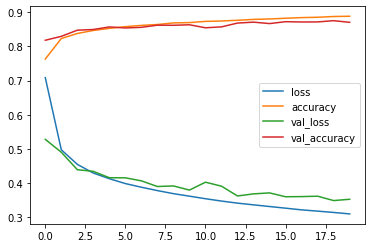

In [11]:
# use model metrics and plot to check the trends for loss, accuracy, validation loss and validation accuracy.
df = pd.DataFrame(hist1.history)
plt.plot(df)
plt.legend(df.columns)

# Question F
## 2)

In [12]:
# create layers input, hidden1, hidden2 and output respectively and create the model
input1 = keras.layers.Flatten(input_shape=[28,28])
hidden1 = keras.layers.Dense(100, activation='relu', name="Hidden1")
hidden2 = keras.layers.Dense(100, activation='relu', name="Hidden2")
output = keras.layers.Dense(10, activation='softmax', name="Output" )
model2 = keras.models.Sequential([input1, hidden1, hidden2, output])
model2.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [13]:
hist2 = model2.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid), verbose=2)

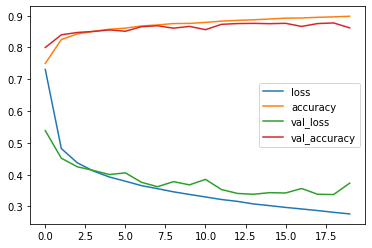

In [14]:
df = pd.DataFrame(hist2.history)
plt.plot(df)
plt.legend(df.columns)

# Question F

## 3)

In [15]:
# create layers input, hidden1, hidden2, hidden3 and output respectively and create the model
input1 = keras.layers.Flatten(input_shape=[28,28])
hidden1 = keras.layers.Dense(100, activation='relu', name="Hidden1")
hidden2 = keras.layers.Dense(100, activation='relu', name="Hidden2")
hidden3 = keras.layers.Dense(100, activation='relu', name="Hidden3")
output = keras.layers.Dense(10, activation='softmax', name="Output" )
model3 = keras.models.Sequential([input1, hidden1, hidden2, hidden3, output])
model3.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 100)               78500     
_________________________________________________________________
Hidden2 (Dense)              (None, 100)               10100     
_________________________________________________________________
Hidden3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [16]:
hist3 = model3.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid), verbose=2)

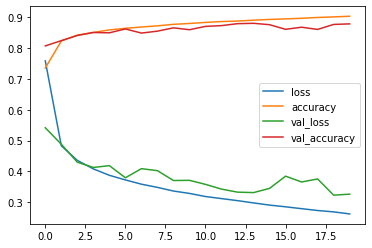

In [17]:
df = pd.DataFrame(hist3.history)
plt.plot(df)
plt.legend(df.columns)